In [138]:
import numpy as np
import scipy
from scipy import sparse
import matplotlib.pyplot as plt

import sys
sys.path.append('./Exact_Diagonalization')  # Add subfolder to Python path

import exact_diagonalization as ed
import Class_site as site
import free_fermion_representation as f

import importlib
importlib.reload(ed)
importlib.reload(site)
importlib.reload(f)


<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

# ED

In [139]:
n_spins = 14
qubit1 = 0
qubit2 = 4

psi_fluxfree = ed.flux_freestate(n_spins, qubit1, qubit2)
psi_diagonal = ed.diagonal_state(n_spins, qubit1, qubit2)

(16384, 16384)
(16384, 16384)
i,j,z 0 1 0
i,j,z 1 0 0


In [140]:
X = sparse.csr_array([[0.,1.],[1.,0.]])
Y = sparse.csr_array([[0.,-1.j],[1.j,0.]])
Z = sparse.csr_array([[1.,0.],[0.,-1.]])
I = sparse.csr_array(np.eye(2))

In [141]:
XX_1 = ed.Op_full(X, I, [1,2], n_spins)
YY_1 = ed.Op_full(Y, I, [1,6], n_spins)
print(psi_fluxfree.conj() @ XX_1 @ psi_fluxfree)
print(psi_fluxfree.conj() @ YY_1 @ psi_fluxfree)
print("These expectation values are 0 because the flux free state \nis paired vertically")

0j
0j
These expectation values are 0 because the flux free state 
is paired vertically


In [142]:
ZXZX = [Z, X, Z, X]

diagonal_1 = ed.Op_string(ZXZX, [2, 3, 4, 7], I, n_spins)
diagonal_2 = ed.Op_string(ZXZX, [6, 7, 10, 13], I, n_spins)
diagonal_3 = - ed.Op_string([Y, X, Z], [3,4,5], I, n_spins)
diagonal_4 = ed.Op_string([X,Z,X,Z], [4,7,10,11], I, n_spins)
diagonal_5 = - ed.Op_string([Z, Y, X], [12, 13, 10], I, n_spins)

ZZ_1 = - ed.Op_full(Z, I, [0,1], n_spins)
ZZ_2 = - ed.Op_full(Z, I, [8,9], n_spins)


In [143]:
print("ZZ_1 ", psi_diagonal.conj() @ ZZ_1 @ psi_diagonal) 
print("ZZ_2 ", psi_diagonal.conj() @ ZZ_2 @ psi_diagonal)
print("diag1 ",psi_diagonal.conj() @ diagonal_1 @ psi_diagonal)
print("diag2 ", psi_diagonal.conj() @ diagonal_2 @ psi_diagonal)
print("diag3 ", psi_diagonal.conj() @ diagonal_3 @ psi_diagonal)
print("diag4 ", psi_diagonal.conj() @ diagonal_4 @ psi_diagonal)
print("diag5 ", psi_diagonal.conj() @ diagonal_5 @ psi_diagonal)


ZZ_1  (-0.9999999999999998-2.3062304917094184e-20j)
ZZ_2  (-0.9999999999999998-2.3062304917094184e-20j)
diag1  (0.9999999999999999-1.7132356737011346e-19j)
diag2  (0.9999999999999998-4.423741104914894e-19j)
diag3  (-0.9999999999999998-2.119997868007293e-19j)
diag4  (0.9999999999999998-1.0123781493477063e-18j)
diag5  (0.9999999999999998-8.693241497287575e-21j)


# FGS

In [144]:
model = site.SitesProtBonds(Npx=2, Npy=1, index = 3)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

14


In [145]:
fgs.reset_cov_0_matrix()
np.linalg.eigvals(fgs.Cov_0)
for i in range(fgs.Cov_0.shape[0]):
    for j in range(fgs.Cov_0.shape[1]):
        if fgs.Cov_0[i,j] != 0:
            print("i ", i, "j ", j, fgs.Cov_0[i,j])

i  0 j  3 (-1+0j)
i  1 j  5 (-1+0j)
i  2 j  9 (1+0j)
i  3 j  0 (1+0j)
i  4 j  11 (1+0j)
i  5 j  1 (1+0j)
i  6 j  10 (1+0j)
i  7 j  12 (-1+0j)
i  8 j  13 (1+0j)
i  9 j  2 (-1+0j)
i  10 j  6 (-1+0j)
i  11 j  4 (-1+0j)
i  12 j  7 (1+0j)
i  13 j  8 (-1+0j)


In [146]:
Op_list = [X, Y, Z, X, Y, Z]
index_list = [3, 2, 1, 6, 7, 4]

W_tilde_1 = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the expectation value
expectation_value = psi_fluxfree.conj() @ W_tilde_1 @ psi_fluxfree

# Print the result
print("First plaquette term:", expectation_value)

First plaquette term: (0.9999999999999991-7.745036314193294e-20j)


In [147]:
Op_list = [X, Y, Z, X, Y, Z]
index_list = [7, 6, 9, 12, 13, 10]

W_tilde_2 = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the expectation value
expectation_value = psi_fluxfree.conj() @ W_tilde_2 @ psi_fluxfree

# Print the result
print("Second plaquette term:", expectation_value)

Second plaquette term: (0.9999999999999991-4.265443305812136e-18j)


In [148]:
Op_list = [Z, X, Z, X]
index_list = [1, 2, 7, 6]

e_loop = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the complex conjugate transpose of psi_diagonal
psi_diagonal_dagger = psi_diagonal.conj()

e_loop_Value = psi_diagonal_dagger @ e_loop @ psi_diagonal

print("e_loop Value:", e_loop_Value)


e_loop Value: (0.9999999999999999-6.143054205688061e-19j)


### e-m anyons

In [149]:
psi_e = ed.Op_full(Z, I, [7,13], n_spins)  @ psi_diagonal.copy()


#check fermion occupation number
e_loop_Value = psi_e.conj() @ e_loop @ psi_e
print("e_loop Value:", e_loop_Value) #should be +1 (fermionic parity)

#check plaquette term:
W1_value = psi_e.conj() @ W_tilde_1 @ psi_e
print("First plaquette term:", W1_value) #should be -1

e_loop Value: (0.9999999999999999-6.143054205688061e-19j)
First plaquette term: (-0.9999999999999998-3.204200040492813e-19j)


In [150]:
print("ZZ_2 ", psi_e.conj() @ ZZ_2 @ psi_e)
print("ZZ_1 ", psi_e.conj() @ ZZ_1 @ psi_e) 
print("diag1 ",psi_e.conj() @ diagonal_1 @ psi_e)
print("diag2 ", psi_e.conj() @ diagonal_2 @ psi_e)
print("diag3 ", psi_e.conj() @ diagonal_3 @ psi_e)
print("diag4 ", psi_e.conj() @ diagonal_4 @ psi_e)
print("diag5 ", psi_e.conj() @ diagonal_5 @ psi_e)

ZZ_2  (-0.9999999999999998-2.3062304917094184e-20j)
ZZ_1  (-0.9999999999999998-2.3062304917094184e-20j)
diag1  (-0.9999999999999999+1.7132356737011346e-19j)
diag2  (0.9999999999999998-4.423741104914894e-19j)
diag3  (-0.9999999999999998-2.119997868007293e-19j)
diag4  (0.9999999999999998-1.0123781493477063e-18j)
diag5  (-0.9999999999999998+8.693241497287575e-21j)


In [151]:
T = 0.2

_, list_e_loop = ed.floquet_evolution(psi_e, 10, n_spins, e_loop, T=T, X=X, Z=Z, Y=Y, I=I)

for i in list_e_loop:
    print(i)
print()

_, list_diagonal1 = ed.floquet_evolution(psi_e, 10, n_spins, diagonal_1, T=T, X=X, Z=Z, Y=Y, I=I)

for i in list_diagonal1:
    print(i)


i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
(0.9999999999999999-6.143054205688061e-19j)
(0.7772224626196044-1.734723475976807e-17j)
(0.3571582319656089+2.7755575615628914e-17j)
(0.10094468601949334+6.071532165918825e-18j)
(0.05402391914765283+5.204170427930421e-18j)
(0.015776957572343937+4.336808689942018e-18j)
(-0.10491849909917665-9.974659986866641e-18j)
(-0.1931484724099714-1.9081958235744878e-17j)
(-0.1616595942465019+1.734723475976807e-17j)
(-0.08897780029377196-6.071532165918825e-18j)
(-0.06659476194691369+0j)

i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
(-0.9999999999999999+1.7132356737011346e-19j)
(-0.7772224626196044+2.0816681711721685e-17j)
(-0.35715823196560886-1.734723475976807e-17j)
(-0.10094468601949337+1.734723475976807e-18j)
(-0.05402391914765284-1.0408340855860843e-17j)
(-0.015776957572343944+8.673617379884035e-19j)
(0.

(-1+0j)
(-0.777222462619606+0j)
(-0.35715823196561025+0j)
(-0.10094468601949408+0j)
(-0.05402391914765332+0j)
(-0.015776957572344298+0j)
(0.10491849909917741-0j)
(0.1931484724099732-0j)
(0.1616595942465039-0j)
(0.08897780029377311-0j)
(0.06659476194691463-0j)

(1+0j)
(0.777222462619606+0j)
(0.35715823196561025+0j)
(0.10094468601949408+0j)
(0.05402391914765332+0j)
(0.015776957572344298+0j)
(-0.10491849909917741+0j)
(-0.1931484724099732+0j)
(-0.1616595942465039+0j)
(-0.08897780029377311+0j)
(-0.06659476194691463+0j)


array([0.00000000e+00+1.j, 2.77555756e-17-1.j, 0.00000000e+00+1.j,
       2.77555756e-17-1.j, 0.00000000e+00+1.j, 2.77555756e-17-1.j,
       0.00000000e+00+1.j, 2.77555756e-17-1.j, 0.00000000e+00+1.j,
       2.77555756e-17-1.j, 0.00000000e+00+1.j, 2.77555756e-17-1.j,
       0.00000000e+00+1.j, 2.77555756e-17-1.j])

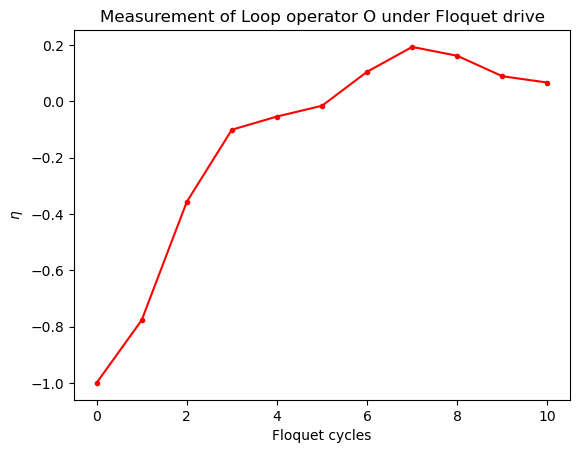

In [152]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T, alpha = -1)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T, alpha = -1)

N = 10
exp_value_loop = []
exp_value_diagonal = []

indices = [2,9]
diagonal = np.zeros(model.Nsites)
diagonal[indices] = 1  # sets all specified indices to 1

for i in range(N):
    exp_value_loop.append(fgs.expectation_val_Majorana_string(model, small_loop=True)[1])
    exp_value_diagonal.append(fgs.expectation_val_Majorana_string(majoranas=diagonal, factor = -1j)[1])
    fgs.update_cov_e_matrix(Re)

exp_value_loop.append(fgs.expectation_val_Majorana_string(model, small_loop=True)[1])
exp_value_diagonal.append(fgs.expectation_val_Majorana_string(majoranas=diagonal, factor = -1j)[1])


for i in exp_value_loop:
    print(i)
print()

for i in exp_value_diagonal:
    print(i)

plt.plot(range(N+1), exp_value_loop, '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")

np.linalg.eigvals(fgs.Cov_0)

In the expectation value of the diagonal we place a prefactor -1j because the parity is i phi_(29) c_2 c_9, with phi_29 = - 1. Without it we would just be measuring c_2 c_9!!!